In [1]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
df = pd.read_csv('datasets/climate/temp_anom_w_forcing.csv')


In [3]:
df = df[df['Year'] >= 1880]

<Axes: xlabel='Year'>

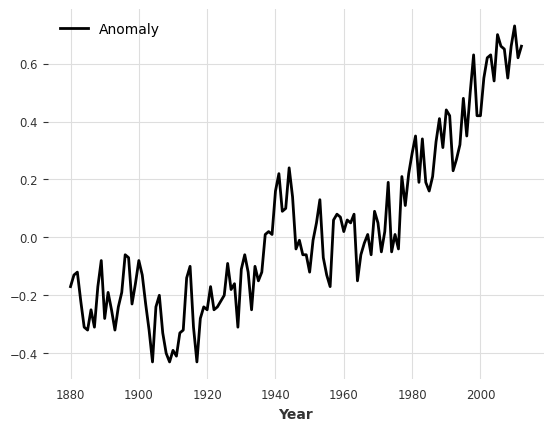

In [4]:
list_of_covariates = ['WMGHG', 'Ozone', 'Solar', 'Land_Use', 'SnowAlb_BC', \
                      'Orbital', 'TropAerDir', 'TropAerInd', 'StratAer']

'''
list_of_covariates = ['WMGHG', 'Ozone', 'Solar', 'Land_Use', 'SnowAlb_BC', \
                      'Orbital', 'TropAerDir', 'TropAerInd']
'''
target_series = TimeSeries.from_dataframe(df, 'Year', 'Anomaly')
past_covariates = TimeSeries.from_dataframe(df, 'Year', list_of_covariates)

target_series.plot()

In [5]:
methods = [member for member in dir(target_series) if callable(getattr(target_series, member)) and not member.startswith("__")]

for method in methods:
    print(method)


_assert_deterministic
_assert_stochastic
_assert_univariate
_combine_arrays
_fill_missing_dates
_get_agg_coords
_get_dim
_get_dim_name
_get_first_timestamp_after
_get_last_timestamp_before
_integer_to_range_indexed_xarray
_observed_freq_datetime_index
_observed_freq_integer_index
_raise_if_not_within
_repr_html_
_restore_xarray_from_frequency
_sort_index
_split_at
add_datetime_attribute
add_holidays
all_values
append
append_values
astype
concatenate
copy
data_array
diff
drop_after
drop_before
drop_columns
end_time
first_value
first_values
from_csv
from_dataframe
from_group_dataframe
from_json
from_pickle
from_series
from_times_and_values
from_values
from_xarray
gaps
get_index_at_point
get_timestamp_at_point
has_same_time_as
head
is_within_range
kurtosis
last_value
last_values
longest_contiguous_slice
map
max
mean
median
min
pd_dataframe
pd_series
plot
prepend
prepend_values
quantile
quantile_df
quantile_timeseries
quantiles_df
random_component_values
resample
rescale_with_value
shift
s

<Axes: xlabel='Year'>

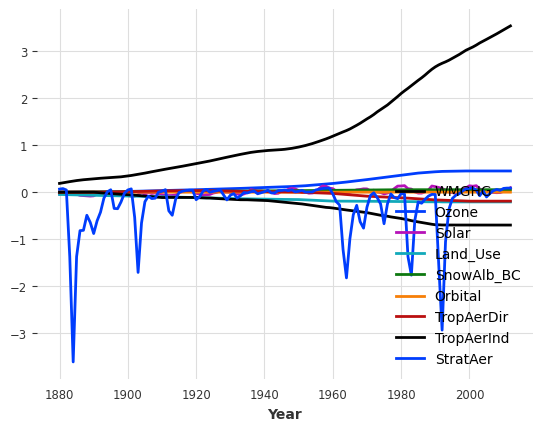

In [6]:
past_covariates.plot()

In [7]:
num_test = 2
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]

In [8]:
n_lags = 3
model = LightGBMModel(lags=n_lags, output_chunk_length=num_test, \
                      lags_past_covariates=[-n_lags]*past_covariates.n_components)

In [9]:
model.fit(target_series_train, past_covariates=past_covariates)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3471
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 84
[LightGBM] [Info] Start training from score 0.014567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LightGBMModel(lags=3, lags_past_covariates=[-3, -3, -3, -3, -3, -3, -3, -3, -3], lags_future_covariates=None, output_chunk_length=2, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [10]:
target_series_test_pred = model.predict(num_test, past_covariates=past_covariates)

In [11]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(target_series_train)
naive_forecast = naive_model.predict(num_test)

<Axes: xlabel='Year'>

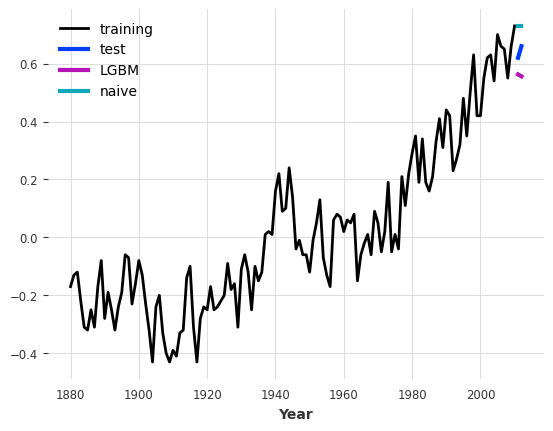

In [12]:
target_series_train.plot(label='training')
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='LGBM', lw=3)
naive_forecast.plot(label='naive', lw=3)

<Axes: xlabel='Year'>

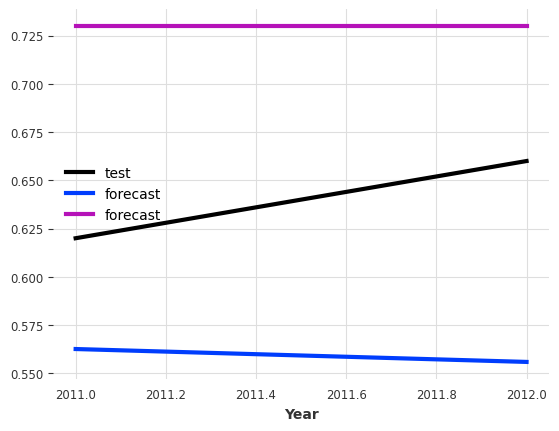

In [13]:
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)
naive_forecast.plot(label='forecast', lw=3)

In [14]:
from darts.metrics.metrics import mape

In [15]:
mape(target_series_test, target_series_test_pred)

12.514575600130536

In [16]:
mape(target_series_test, naive_forecast)

14.173998044965783

In [17]:
target_series_test

<TimeSeries (DataArray) (Year: 2, component: 1, sample: 1)>
array([[[0.62]],

       [[0.66]]])
Coordinates:
  * Year       (Year) int64 2011 2012
  * component  (component) object 'Anomaly'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None